In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice  
from operator import attrgetter
from scipy.stats import binom
import scipy
import itertools

Entropy

In [2]:
def entropy(probs):
    logs = -1 * (np.log2(probs))
    entro = probs @ logs
    
    return entro

Binary entropy

In [3]:
def binary_entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return p * np.log2(1/p) + (1 - p) * np.log2(1/(1 - p))

### Binary symmetric channel

In [4]:
def bsc(f, p1): # f:error; p1:probability of input 1 bit
    entropy_Y = binary_entropy(p1 * (1 - f) + (1 - p1) * f)
    entropy_Y_given_X = binary_entropy(f)
    
    return entropy_Y - entropy_Y_given_X
    

f = 0.15

Optimal input distribution is: (0.5, 0.5) and achieves 0.39 bits.


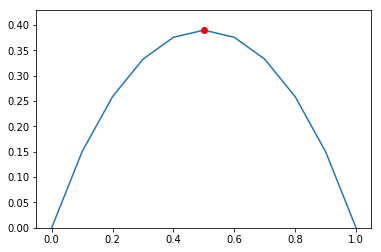

In [5]:
binary_ch = [bsc(0.15, p1) for p1 in np.arange(0, 1.1, 0.1)]

max_x = binary_ch.index(max(binary_ch))/10
max_y = max(binary_ch)
plt.ylim(0, max_y + max_y/10)
plt.plot(np.arange(0, 1.1, 0.1), binary_ch)
plt.plot(max_x, max_y, 'ro')

print('Optimal input distribution is:', (max_x, 1 - max_x), 'and achieves', round(max_y, 2), 'bits.')

f = 0.5

Optimal input distribution is: (0.0, 1.0) and achieves 0.0 bits.


C:\Users\Miguel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  ret = ax.set_ylim(*args, **kwargs)


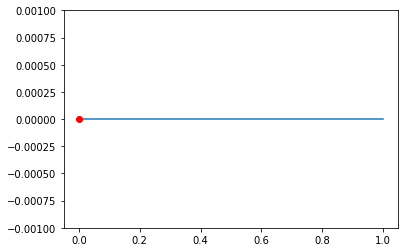

In [6]:
binary_ch = [bsc(0.5, p1) for p1 in np.arange(0, 1.1, 0.1)]

max_x = binary_ch.index(max(binary_ch))/10
max_y = max(binary_ch)
plt.ylim(0, max_y + max_y/10)
plt.plot(np.arange(0, 1.1, 0.1), binary_ch)
plt.plot(max_x, max_y, 'ro')

print('Optimal input distribution is:', (max_x, 1 - max_x), 'and achieves', round(max_y, 2), 'bits.')

### Z channel

In [7]:
def Z_channel(f, p1):
    entropy_Y = binary_entropy(p1 * (1 - f))
    entropy_Y_given_X = p1 * binary_entropy(f)
    
    return entropy_Y - entropy_Y_given_X

f = 0.15

Optimal input distribution is: (0.4, 0.6) and achieves 0.68 bits.


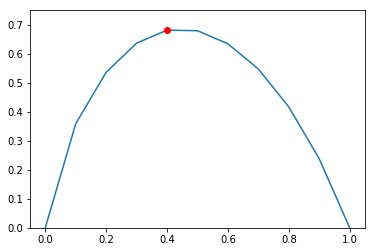

In [8]:
z_ch = [Z_channel(0.15, p1) for p1 in np.arange(0, 1.1, 0.1)]

max_x = z_ch.index(max(z_ch))/10
max_y = max(z_ch)
plt.ylim(0, max_y + max_y/10)
plt.plot(np.arange(0, 1.1, 0.1), z_ch)
plt.plot(max_x, max_y, 'ro')

print('Optimal input distribution is:', (max_x, 1 - max_x), 'and achieves', round(max_y, 2), 'bits.')

f = 0.5

Optimal input distribution is: (0.4, 0.6) and achieves 0.32 bits.


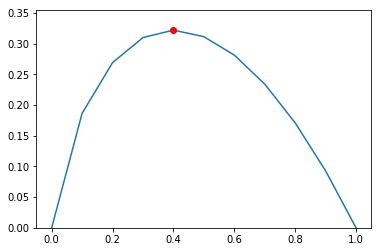

In [9]:
z_ch = [Z_channel(0.5, p1) for p1 in np.arange(0, 1.1, 0.1)]

max_x = z_ch.index(max(z_ch))/10
max_y = max(z_ch)
plt.ylim(0, max_y + max_y/10)
plt.plot(np.arange(0, 1.1, 0.1), z_ch)
plt.plot(max_x, max_y, 'ro')

print('Optimal input distribution is:', (max_x, 1 - max_x), 'and achieves', round(max_y, 2), 'bits.')

### Binary erasure channel

In [10]:
def er_channel(f, p1):
    entropy_Y = binary_entropy(p1)
    entropy_Y_given_X = f * binary_entropy(p1)
    
    return entropy_Y - entropy_Y_given_X

Optimal input distribution is: (0.5, 0.5) and achieves 0.85 bits.


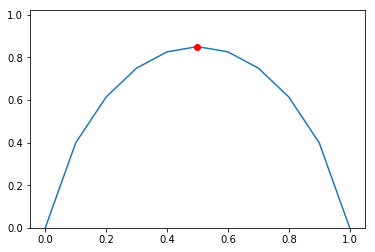

In [11]:
er_ch = [er_channel(0.15, p1) for p1 in np.arange(0, 1.1, 0.1)]

max_x = er_ch.index(max(er_ch))/10
max_y = max(er_ch)
plt.ylim(0, max_y + max_y/5)
plt.plot(np.arange(0, 1.1, 0.1), er_ch)
plt.plot(max_x, max_y, 'ro')

print('Optimal input distribution is:', (max_x, 1 - max_x), 'and achieves', round(max_y, 2), 'bits.')

### Capacity 

In [12]:
def capacity_BSC(f):
    return 1 - binary_entropy(f)

In [13]:
def capacity_BEC(f):
    return 1 - f

In [14]:
def capacity_Z(f):
    der = np.log2(1 - f + f**(f / (f - 1))) - f/(f - 1) * np.log2(f)
    
    return der

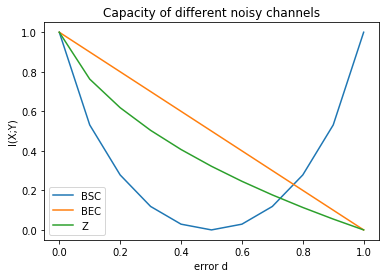

In [15]:
cap_BSC = [capacity_BSC(f) for f in np.arange(0, 1.1, 0.1)]
cap_BEC = [capacity_BEC(f) for f in np.arange(0, 1.1, 0.1)]
cap_Z = [capacity_Z(f) for f in np.arange(1e-10, 1.1, 0.1)]

fig, ax = plt.subplots()
plt.plot(np.arange(0, 1.1, 0.1), cap_BSC)
plt.plot(np.arange(0, 1.1, 0.1), cap_BEC)
plt.plot(np.arange(0, 1.1, 0.1), cap_Z)
ax.set_title('Capacity of different noisy channels')
plt.legend(["BSC", "BEC", "Z"])
ax.set_xlabel('error d')
ax.set_ylabel('I(X;Y)')
plt.show()

### Rate distortion function

In [22]:
def rate_distortion_BSC(p, f):
    if f == 0:
        return entropy(p)    
    
    elif f >= min(p):
        return 0
    
    else:
        return entropy(p) - binary_entropy(f)

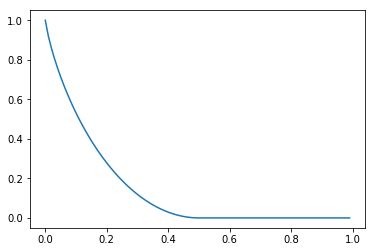

In [23]:
probs = np.full((2), 1/2)
rdist_BSC = [rate_distortion_BSC(probs, f) for f in np.arange(0, 1, 0.01)]

plt.plot(np.arange(0, 1, 0.01), rdist_BSC)